In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


<AxesSubplot:>

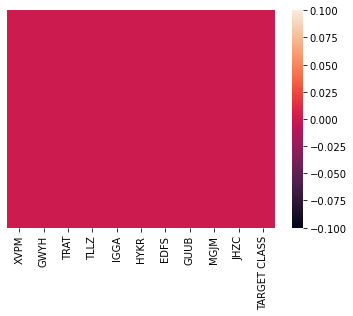

In [9]:
sns.heatmap(df.isnull(),yticklabels=False)

<AxesSubplot:>

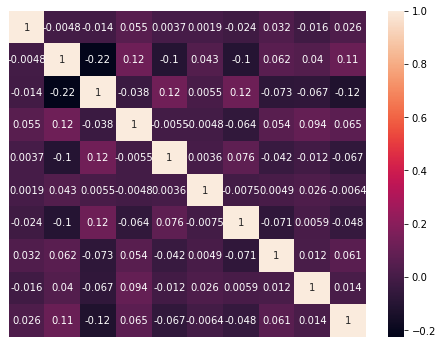

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop('TARGET CLASS',axis=1).corr(),annot=True,yticklabels=False,xticklabels=False)

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler=StandardScaler()

In [27]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [28]:
scaled_feat=scaler.transform(df.drop('TARGET CLASS',axis=1))

In [29]:
scaled_feat

array([[ 1.56852168, -0.44343461,  1.61980773, ..., -0.93279392,
         1.00831307, -1.06962723],
       [-0.11237594, -1.05657361,  1.7419175 , ..., -0.46186435,
         0.25832069, -1.04154625],
       [ 0.66064691, -0.43698145,  0.77579285, ...,  1.14929806,
         2.1847836 ,  0.34281129],
       ...,
       [-0.35889496, -0.97901454,  0.83771499, ..., -1.51472604,
        -0.27512225,  0.86428656],
       [ 0.27507999, -0.99239881,  0.0303711 , ..., -0.03623294,
         0.43668516, -0.21245586],
       [ 0.62589594,  0.79510909,  1.12180047, ..., -1.25156478,
        -0.60352946, -0.87985868]])

In [45]:
df_feat=pd.DataFrame(scaled_feat,columns=df.columns[:-1])

In [46]:
df_feat.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X=df_feat
y=df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
error_rate=[]
for i in range(1,25):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(y_test != pred_i))


Text(0.5, 1.0, 'Erro vs K value')

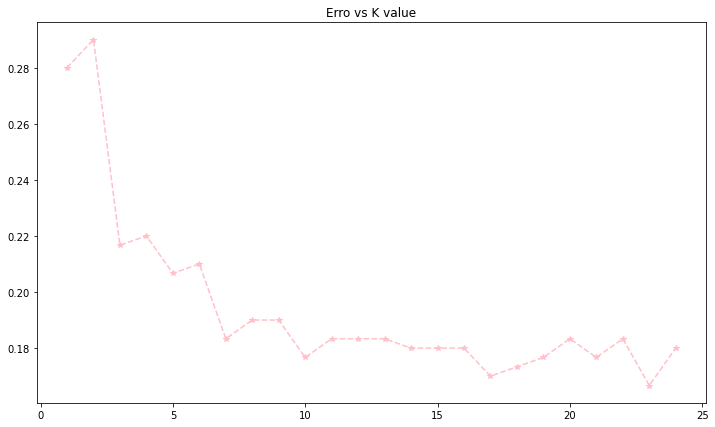

In [55]:
plt.figure(figsize=(12,7))
plt.plot(range(1,25),error_rate,color='pink',linestyle='dashed',marker='*')
plt.title('Erro vs K value')

In [56]:
#After finalising K value =18

In [66]:
knn=KNeighborsClassifier(n_neighbors=18,)
knn.fit(X_train,y_train)
pred_18=knn.predict(X_test)


In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [67]:
print(classification_report(y_test,pred_18))
print(confusion_matrix(y_test,pred_18))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       152
           1       0.83      0.82      0.82       148

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

[[127  25]
 [ 27 121]]


In [68]:
knn.score(X_test,y_test)

0.8266666666666667